# Dataset

In this final project, you will analyze the performance of the 10 big fast-food companies in the stock market over the years. To do so, you will have to form groups of 5 people and give answers to all the questions provided below.

Each dataset contains 10 CSV files corresponding to a different fast-food company’s stock:

- **BRK-A**: Berkshire Hathaway Inc.
- **DNUT**: Krispy Kreme, Inc.
- **DPZ**: Domino’s Pizza, Inc.
- **LKNCY**: Luckin Coffee Inc.
- **MCD**: McDonald’s Corporation
- **PZZA**: Papa John’s International, Inc.
- **QSR**: Restaurant Brands International, Inc.
- **SBUX**: Starbucks Corporation
- **WEN**: The Wendy’s Corporation
- **YUM**: Yum! Brands, Inc.

## Columns

The datasets contain the following columns:

- **Date**: Trading date  
- **Open**: Opening price  
- **High**: Highest price during session  
- **Low**: Lowest price during session  
- **Close**: Closing price  
- **Adj Close**: Closing price adjusted for dividends and stock splits  
- **Volume**: Number of shares traded during the session


# Exercises

You will have to give answers to the following 10 exercises (1 point each):

**Preprocessing steps**

In [14]:
# Impoprt all the libraries necesaires for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [15]:
# Importing the 10 datasets for the exercises
# Create a dictionary to store all of them
all_datasets = {}
databases_path = './Databases' # The path where the datasets are located 

# Here we use for loop to iterate over the folder where the datasets are, extract them and store them in a dictionary. 
for database in os.listdir(databases_path):
    database_name = database.split('.')[0]
    df = pd.read_csv(os.path.join(databases_path, database))
    all_datasets[database_name] = df

In [16]:
# Preprocessing steps for each dataset
# For faster pre-processing, we use a for loop to filter and clean each dataset at a time.
for name, dataset in all_datasets.items():
    # 1. Change the Date column to a datetime object and drop the duplicates. There are no missing values in Date so we do not remove them
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
    dataset = dataset.drop_duplicates(subset='Date', keep='first') #Here we remove the duplicate values in Date this is the distribution (SBUX 4, DPZ 4, MCD 4, LKNCY 4, QSR 0, WEN 4, PZZA 3, YUM 4, BRK-A 4, DNUT 3)

    # 2. Sort by ‘Date’ for time consistency
    dataset = dataset.sort_values(by='Date')

    # 3. As the date is already clean, we only focus on the other numeric columns by storing them in a variable
    numeric_columns = dataset.select_dtypes(include='number').columns

    # 4. Here we handle missing values by column and using .ffill().bfill() which enters the NaN values with the next or last value of the column.
    for col in numeric_columns:
        dataset[col] = dataset[col].ffill().bfill()

    # 5. After dealing with all missing values, we focus on removing outliers. There are outliers in all databases except QSR, and in all columns except Volume and Date.  
    if name != 'QSR':  # As explained above, we exclude ‘QSR’ from cleaning and filtering.
        for col in numeric_columns.drop(['Volume'], errors='ignore'): #We also delete the Volume column as it is already OK. 
            quantile_97 = dataset[col].quantile(0.97) #To remove outliers, we remove all values that are beyond the 97th quantile. 
            dataset[col] = dataset[col].mask(dataset[col] > quantile_97) #In order not to lose data, instead of deleting them, we decided to transform them into NaN values to impute after 

    # 6. Here we fill the transformed values using the same method as before (.ffill().bfill()).
    for col in numeric_columns:
        dataset[col] = dataset[col].ffill().bfill()

    # 7. Finally, we update each pre-processed dataset in the dictionary created earlier.
    all_datasets[name] = dataset

1. **For each dataset**:
   - Print the number of rows and columns.
   - Display the column names and their data types.

2. **Extract all rows where the date is in the year 2023**:
   - Print the number of rows.
   - Visualize the Close price trend for this period.

The company SBUX has 250 rows in 2023.
The company DPZ has 250 rows in 2023.
The company MCD has 250 rows in 2023.
The company LKNCY has 250 rows in 2023.
The company QSR has 250 rows in 2023.
The company WEN has 250 rows in 2023.
The company PZZA has 250 rows in 2023.
The company YUM has 250 rows in 2023.
The company BRK-A has 250 rows in 2023.
The company DNUT has 250 rows in 2023.
The total number of rows where the year is 2023 is 2500


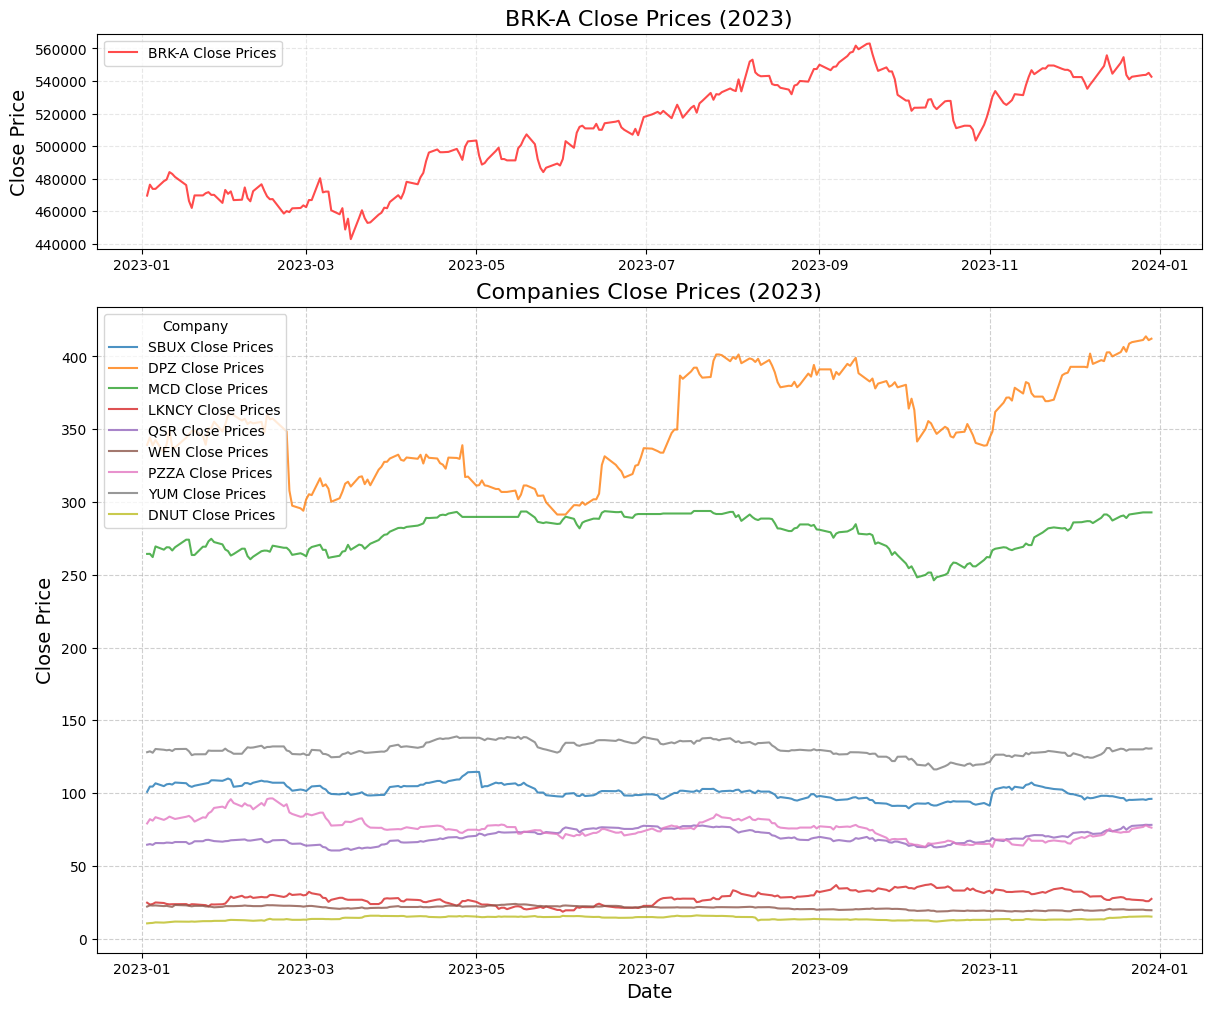

In [17]:
# Create a variable to store the rows from 2023
total_rows_2023 = 0

# Use a for loop to iterate over the dataset dictionary and filter the rows by 2023, then add them, count the length and add it to a variable calculating the total rows. 
for name, dataset in all_datasets.items():
    rows_in_2023 = dataset[dataset['Date'].dt.year == 2023]  # Filter rows for 2023
    num_rows = len(rows_in_2023)
    print(f'The company {name} has {num_rows} rows in 2023.')  # Print number of rows for each company
    total_rows_2023 += num_rows  # Update the total row count

print(f'The total number of rows where the year is 2023 is {total_rows_2023}') # Print the total number of rows in 2023

# When plotting all the companies, we noticed that there is one with a big price difference (BRK-A) so plotting them together to see the trends distorts the whole chart.
# For this reason we decided to try different solutions:
    # 1. Plot individual graphs, however it is not really useful for identifying trends.
    # 2. Normalize the data to make companies comparable, but the graph is not really easy to decipher visually.
    # 3. Use two axes, so that the one on the left measures the price of the 9 other companies and the one on in the right measures the price of the BRK-A. However also showed some problems with distribution
    # 4. Finally we decided on a panel chart, one for BRK-A and one for the remaining companies. Wich is the code shown below. 

# Here we define the two plots into ax1 and ax2 
fig, (brka_plot, companies_plot) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 3]}, constrained_layout=True)

# Panel for BRK-A. We select the rows that are from 2023 and for BRK-A and plot the graph
rows_in_2023_for_brk = all_datasets['BRK-A'][all_datasets['BRK-A']['Date'].dt.year == 2023]
brka_plot.plot(rows_in_2023_for_brk['Date'], rows_in_2023_for_brk['Close'], label='BRK-A Close Prices', color='red', linewidth=1.5, alpha=0.7,)
# Details and costumitzation for the BRK-A plot 
brka_plot.set_title('BRK-A Close Prices (2023)', fontsize=16)
brka_plot.set_ylabel("Close Price", fontsize=14)
brka_plot.legend(fontsize=10, loc='upper left')
brka_plot.grid(True, linestyle='--', alpha=0.3)

# Plot for the other companies here we do exactly the same for the BRK-A chart, but for the other 9 companies we use a loop to iterate over the dictionary.
for name, dataset in all_datasets.items(): 
    if name != 'BRK-A':  # A conditional to not use BRK-A for this plot
        rows_in_2023_rest_companies = dataset[dataset['Date'].dt.year == 2023]
        companies_plot.plot(rows_in_2023_rest_companies['Date'], rows_in_2023_rest_companies['Close'], label=f'{name} Close Prices', linewidth=1.5, alpha=0.8, )
# Details and costumitzation for the companies plot 
companies_plot.set_title('Companies Close Prices (2023)', fontsize=16)
companies_plot.set_ylabel('Close Price', fontsize=14)
companies_plot.set_xlabel('Date', fontsize=14)
companies_plot.legend(title='Company', fontsize=10, loc='upper left')
companies_plot.grid(True, linestyle='--', alpha=0.6)
# Show the plot
plt.show()

3. **For each company**:
   - Find the day with the highest Close price and display it alongside the price.

4. **Group the data by month**:
   - Calculate the average Close price for each company.
   - Plot these monthly averages for 3 companies and compare them.
   - Justify the chart selection.

5. **For each company**:
   - Compute the yearly average of the Close price.
   - Plot a comparison of yearly averages for all companies on a chart.
   - Justify your chart selection.

6. **For each company**:
   - Create a plot showing the range of prices for each month.
   - Justify the chart selection.

7. **Create a plot showing the relationship between trading volume and the Close price**:
   - Select one company.
   - Add insights about the pattern.
   - Justify your chart selection.

8. **For each company**:
   - Identify the month with the highest total trading volume.
   - Display the results in a summary table, showing the month and total volume.

9. **Merge the datasets for all companies**:
   - Create a single dataset, one for each year.
   - Print the structure of the combined dataset, ensuring proper alignment and handling of missing values.

In [18]:
# The clean-up steps have already been performed in the previous steps, so the data is clean and ready for merging.
# Create a list for storing all datasets for future concatenation
list_datasets = []

# Use a for loop over the dictionary we have been using throughout the project to add a Company column in each dataset
for name, dataset in all_datasets.items():
    dataset["Company"] = name  # Add the Company column
    dataset["Year"] = dataset["Date"].dt.year  # Add the Year column
    list_datasets.append(dataset)

# Combine all the datasets into one
merged_data = pd.concat(list_datasets, ignore_index=True)

# Print the structure of the combined dataset
print("Shape of merged dataset:", merged_data.shape)

# Create a dictionary to store all the datasets for each year
datasets_by_year = {}

# Use a for loop to go through each year and store the rows from that year in a single dataset
for year in merged_data["Year"].unique():
    datasets_by_year[year] = merged_data[merged_data["Year"] == year]
    print(f"Dataset for year {year} has shape: {datasets_by_year[year].shape}")

Shape of merged dataset: (69549, 9)
Dataset for year 1992 has shape: (893, 9)
Dataset for year 1993 has shape: (1157, 9)
Dataset for year 1994 has shape: (1260, 9)
Dataset for year 1995 has shape: (1260, 9)
Dataset for year 1996 has shape: (1270, 9)
Dataset for year 1997 has shape: (1339, 9)
Dataset for year 1998 has shape: (1512, 9)
Dataset for year 1999 has shape: (1512, 9)
Dataset for year 2000 has shape: (1512, 9)
Dataset for year 2001 has shape: (1488, 9)
Dataset for year 2002 has shape: (1512, 9)
Dataset for year 2003 has shape: (1512, 9)
Dataset for year 2004 has shape: (1633, 9)
Dataset for year 2005 has shape: (1764, 9)
Dataset for year 2006 has shape: (1757, 9)
Dataset for year 2007 has shape: (1757, 9)
Dataset for year 2008 has shape: (1771, 9)
Dataset for year 2009 has shape: (1764, 9)
Dataset for year 2010 has shape: (1764, 9)
Dataset for year 2011 has shape: (1764, 9)
Dataset for year 2012 has shape: (1750, 9)
Dataset for year 2013 has shape: (1764, 9)
Dataset for year 20

10. **For each company**:
    - Calculate the spread between the High and Low prices for each day.
    - Compute the average spread for each company.
    - Visualize the result in a chart and justify the chart selection.
    - Interpret which companies exhibit the largest spreads and why this might happen.